## Data pre-processing.

data preprocessing refers to the transformation and preparation of raw data before it is used for analysis or modeling. It involves various techniques and methods to clean, transform, and enhance the data to improve its quality, usability, and compatibility with the intended analysis or modeling algorithms.
the importance of the pre-processing.
+ Data Quality Improvement
+ Feature Engineering
+ Noise Reduction
+ Normalization and Standardization
+ Data Integration
+ Data Reduction
+ Improving Model Performance

In [1]:
# importing the libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('/Users/tarakram/Documents/Churn-Prediction/data/processed/cleaned_data.csv')
pd.set_option('display.max_columns', None)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,DSL,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,DSL,Yes,One year,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,DSL,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,DSL,Yes,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,Fiber optic,No,Month-to-month,Electronic check,70.70,151.65,Yes


In [3]:
data.dtypes

gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
InternetService     object
OnlineSecurity      object
Contract            object
PaymentMethod       object
MonthlyCharges     float64
TotalCharges        object
Churn               object
dtype: object

In [4]:
# Our dataset has more categorical variables, we have to convert them into numerical.

In [5]:
#let's divide the num and cat variables 
num_vals = []
cat_vals = []
for i in data:
    if data[i].dtype == 'object':
        cat_vals.append(i)
    else:
        num_vals.append(i)

print(num_vals)
print(cat_vals)

['SeniorCitizen', 'tenure', 'MonthlyCharges']
['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'OnlineSecurity', 'Contract', 'PaymentMethod', 'TotalCharges', 'Churn']


In [6]:
# Let's see the value counts,
# defining the function that gives the value counts of all features 
def value_counts(data, cat_vals):
    for i in cat_vals:
        print(f'Value counts of {i}', data[i].value_counts())


In [7]:
value_counts(data, cat_vals)

Value counts of gender gender
Male      3533
Female    3476
Name: count, dtype: int64
Value counts of Partner Partner
No     3607
Yes    3402
Name: count, dtype: int64
Value counts of Dependents Dependents
No     4899
Yes    2110
Name: count, dtype: int64
Value counts of PhoneService PhoneService
Yes    6327
No      682
Name: count, dtype: int64
Value counts of InternetService InternetService
Fiber optic    3090
DSL            2418
No             1501
Name: count, dtype: int64
Value counts of OnlineSecurity OnlineSecurity
No                     3489
Yes                    2019
No internet service    1501
Name: count, dtype: int64
Value counts of Contract Contract
Month-to-month    3841
Two year          1695
One year          1473
Name: count, dtype: int64
Value counts of PaymentMethod PaymentMethod
Electronic check             2359
Mailed check                 1585
Bank transfer (automatic)    1543
Credit card (automatic)      1522
Name: count, dtype: int64
Value counts of TotalCharge

In [8]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,DSL,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,DSL,Yes,One year,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,DSL,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,DSL,Yes,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,Fiber optic,No,Month-to-month,Electronic check,70.70,151.65,Yes


Here we can replace some of the columns, lets say if there is no phone service means it is technically No in multplelines.

In [9]:
data['OnlineSecurity'] = data['OnlineSecurity'].replace('No internet service','No') # replacing the no internet service with no

In [10]:
# using label Encoding for the cat_vals that has two data points ex - ( True or False, one or two , etc)
encode_vals = ['gender', 'Partner','Dependents','Churn','PhoneService','OnlineSecurity','InternetService','PaymentMethod','Contract']

In [11]:
def label_encode(data, encode_vals):
    for i in encode_vals:
        label_encoder = LabelEncoder()
        data[i] = label_encoder.fit_transform(data[i])

In [12]:
label_encode(data, encode_vals)

In [13]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,2,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,1,0,3,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,42.30,1840.75,0
4,0,0,0,0,2,1,1,0,0,2,70.70,151.65,1


In [14]:
data.shape

(7009, 13)

In [15]:
data.isnull().sum()

gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
InternetService    0
OnlineSecurity     0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

In [16]:
data.duplicated().sum()

0

In [17]:
data.dtypes

gender               int64
SeniorCitizen        int64
Partner              int64
Dependents           int64
tenure               int64
PhoneService         int64
InternetService      int64
OnlineSecurity       int64
Contract             int64
PaymentMethod        int64
MonthlyCharges     float64
TotalCharges        object
Churn                int64
dtype: object

In [18]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').astype(float).fillna(0).astype(int)


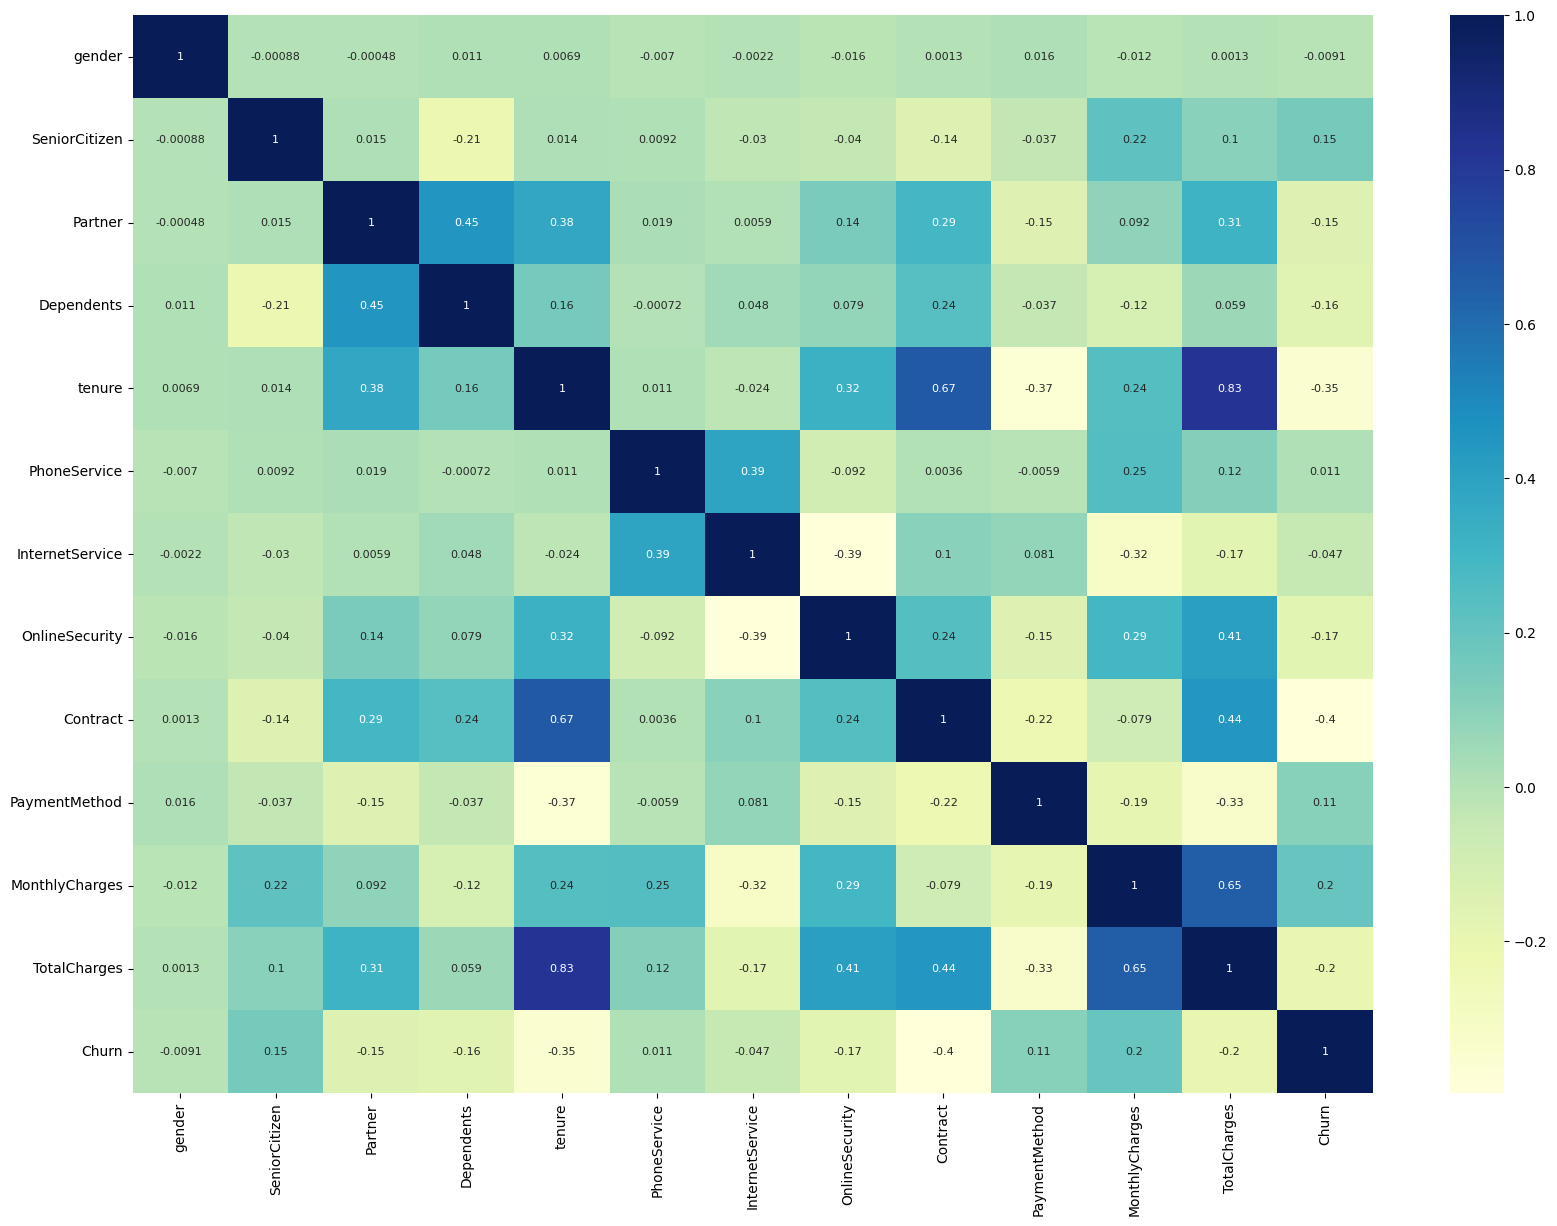

In [19]:
# it is really Hard to see the Correaltion here in the table. Lets plot Heatmap.
plt.figure(figsize= (20,14))
sns.heatmap(data.corr(),cmap='YlGnBu', annot = True,annot_kws={'fontsize': 8})
plt.show()

### Here we are mainly focusing on the churn ( output variable )

contract-month-to-month had good correalation with Churn.<br>
PaymentMethod_Electronic Check Had Good correaltion with Churn.<br>

**these are some of the important features with respect to churn.**
+ Contract - Month - to Month 
+ Payment Method _ electronic check
+ internet service_fiber optic
+ monthly charges
+ paperless billing <br>
etc.

In [20]:
# saving the pre-processed data set into processed folder. 
data.to_csv('/Users/tarakram/Documents/Churn-Prediction/data/processed/pre-processed_data.csv', index= False)